# [Data Analysis and Graphics Using R](../Resources/Data-Analysis-and-Graphics-Using-R.pdf) (Section 2)

# 2 Styles of data analysis

What is the best way to begin investigation of a new set of data? What forms of data
exploration will draw attention to obvious errors or quirks in the data, or to obvious clues
that the data contain? What checks are desirable before proceeding with an intended formal
analysis, or to help decide what formal analysis may be appropriate? What can be learned
from investigations that other researchers have done with similar data?

Competent statisticians have always used graphs to check their data. Numerical summaries, such as an average, can be very useful, but important features of the data may be missed without a glance at an appropriate graph. Careful consideration may be needed to choose a graph that will be effective for the purpose in hand. We will see in Chapter 3 that an integral part of statistical analysis is the development of a model that accurately describes the data, clarifies what the data say, and makes prediction possible. Without model assumptions, there cannot be a meaningful formal analysis! As
assumptions are strengthened, the chances of getting clear results improve. The price for stronger assumptions is that, if wrong, the results may be wrong. Graphical techniques have been developed for checking, to the extent possible, many of the assumptions that must be made in practice.

Preliminary scrutiny of the data can readily degenerate into data snooping, so that the
analysis is unduly attuned to statistical artefacts of the particular data that are to be analyzed.
Under torture, the data readily yield false confessions. To avoid this, strict limits must be
placed on the extent to which the data are allowed to influence the choice of model for the
formal analysis.

Even if data have not been collected in a way that makes them suitable for formal
statistical analysis, exploratory techniques can often glean clues from them. However, it is
unwise, as too often happens, to rely on this possibility!

## 2.1 Revealing views of the data

The use of graphs to display and help understand data has a long tradition. John W. Tukey
formalized and extended this tradition, giving it the name Exploratory Data Analysis
(EDA). Tukey has had a huge influence on data analysis practices; see Hoaglin (2003).
A key concern is that data should, as far as possible, have the opportunity to speak for
themselves, prior to or as part of a formal analysis.

A use of graphics that is broadly in an EDA tradition continues to develop and evolve.
Statistical theory has an important role in suggesting forms of display that may be helpful and interpretable. Advances in computing have been important, facilitating the development
and use of many of the graphical tools now available. The best modern statistical software
makes a strong connection between data analysis and graphics, combining the computer’s
ability to crunch numbers and present graphs with the ability of a trained human eye to
detect pattern.

Graphical exploration after the style of EDA has at least four roles:


- It may suggest ideas and understandings that had not previously been contemplated. This use of EDA fits well with the view of science as inductive reasoning. 

- It may challenge the theoretical understanding that guided the initial collection of the data. It then acquires a more revolutionary role. It becomes the catalyst, in the language of Thomas Kuhn, for a paradigm shift. 

- It allows the data to criticize an intended analysis and facilitates checks on assumptions. Subsequent formal analysis can then proceed with greater confidence. 

- It may reveal additional information, not directly related to the research question. It may, for example, suggest fruitful new lines of research.

The next several subsections will describe the histogram and density plot, the stem-andleaf display, the boxplot, the scatterplot, the lowess smoother, and the trellis-style graphics
that are available in the lattice package. The lattice functions greatly extend the available
styles and layouts.

## 2.1.1 Views of a single sample
### Histograms and density plots

The histogram is a basic (and over-used) EDA tool for displaying the frequency distribution
of a set of data. The area of each rectangle of a histogram is proportional to the number of
observations whose values lie within the width of the rectangle. A mound-shaped histogram
may make it plausible that the data follow a normal distribution (the “bell curve”). In small
samples, however, the shape can be highly irregular. In addition, the appearance can depend
on the choice of breakpoints, which is a further reason for caution in interpreting the shape.
It is often helpful to try more than one set of breakpoints.
The data set possum (DAAG package) has nine morphometric measurements on each
of 104 mountain brushtail possums, trapped at seven sites from southern Victoria to central
Queensland (data relate to Lindenmayer et al., 1995). Attention will be limited to the
measurements for 43 females, placing them in a subset data frame that will be called
fossum. The following code creates this subset data frame:

In [1]:
library(DAAG) # Ensure that the DAAG package is attached

Loading required package: lattice



In [2]:
## Form the subset of possum that holds data on females only
fossum <- subset(possum, sex=="f")

Like the histogram, the boxplot is a coarse summary. It allows a trained eye to comprehend
at a glance specific important features of the data. Figure 2.3 shows a boxplot of total lengths
of females in the possum data set, with annotation added that explains the interpretation
of boxplot features. Code that gives the boxplot, without the annotation, is:

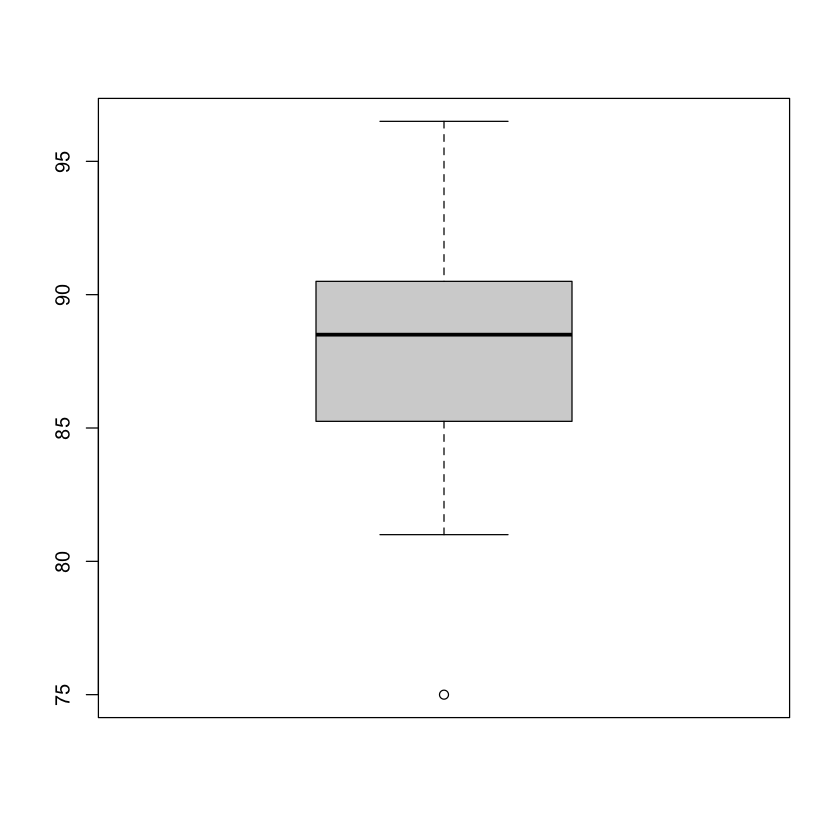

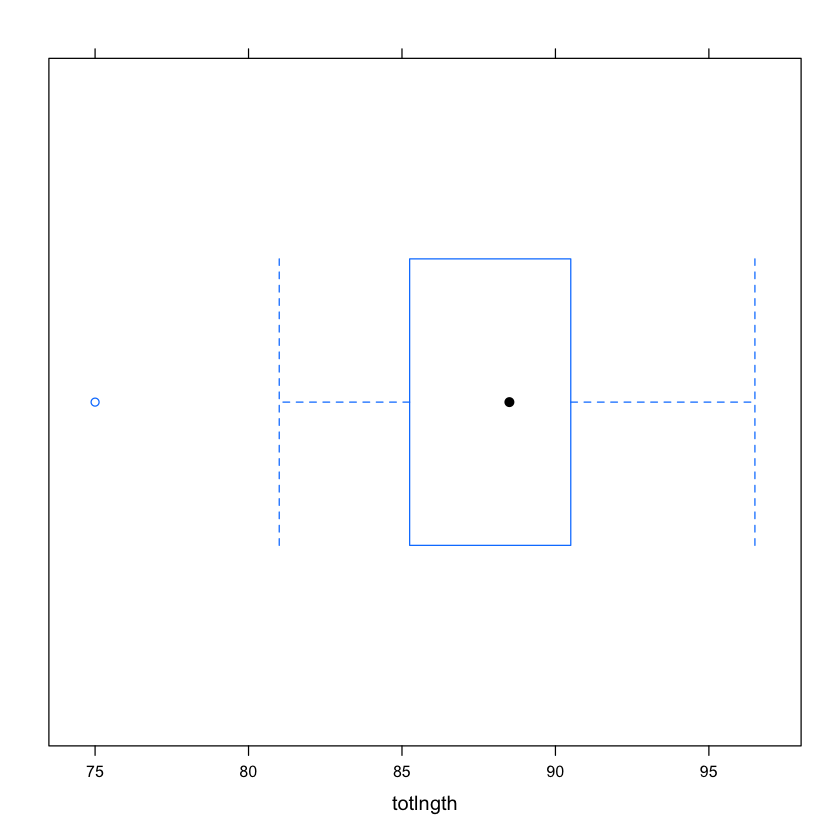

In [3]:
## Base graphics boxplot function
with(fossum, boxplot(totlngth, horiz=TRUE))
## Alternative: lattice graphics bwplot function
bwplot(~totlngth, data=fossum)

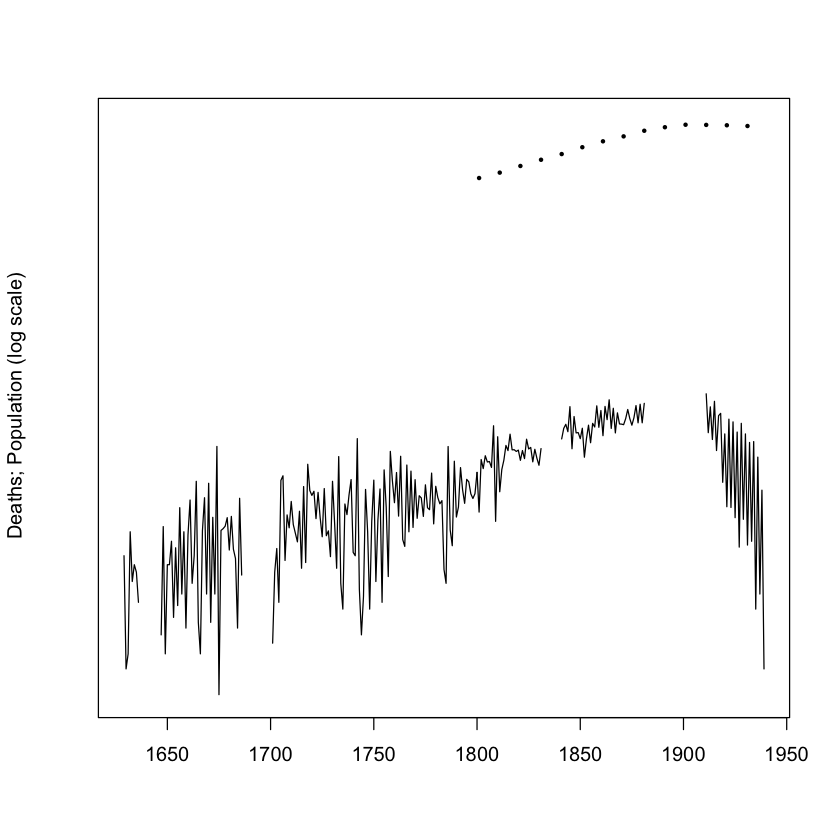

In [11]:
plot(log10(measles), xlab="", ylim=log10 (c(1,5000*1000)),
ylab=" Deaths; Population (log scale)", yaxt="n")
ytiks <- c(1, 10, 100, 1000, 1000000, 5000000)
## London population in thousands
londonpop <- ts(c(1088,1258,1504,1778,2073,2491,2921,3336,3881,4266,4563,4541,4498,4408), 
                start=1801, end=1931, deltat=10)
points(log10(londonpop*1000), pch=16, cex=.5) 


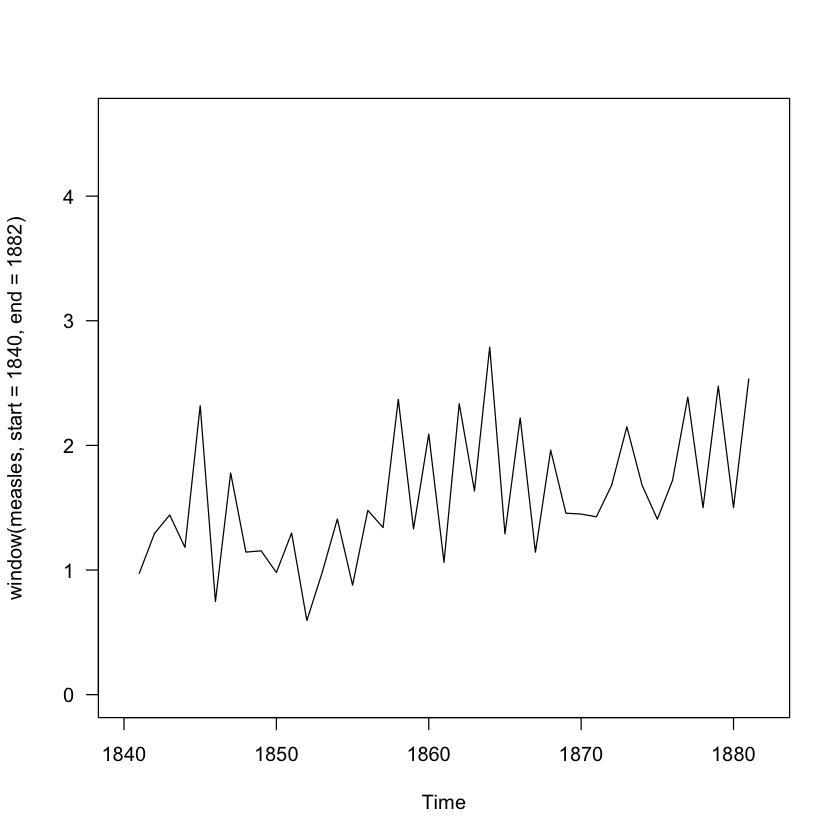

In [12]:
## Panel B
plot(window(measles, start=1840, end=1882), ylim=c (0, 4600),
yaxt="n")
axis(2, at=(0:4)* 1000, labels=paste(0:4), las=2)


The function plot() recognizes that measles is a time series object, and calls the
plot method plot.ts() that is used for time series. For details, see help(plot.ts).
Notice the use, for panel B, of the function window() that extracts a subseries.

Panel A shows broad trends over time, but is of no use for identifying changes on the
time scale of a year or two. In panel B, the lines that show such changes are, mostly, at an
angle that is in the approximate range of 20◦ to 70◦ from the horizontal.

A sawtooth pattern, by which years in which there are many deaths are commonly
followed by years in which there are fewer deaths, is thus clearly evident. (To obtain
this level of detail for the whole period from 1629 until 1939, multiple panels would be
necessary.)

The following, with y-axis labeling in logarithms of numbers and omitting the population
estimates, demonstrates the combining of the two graphs on the one page:

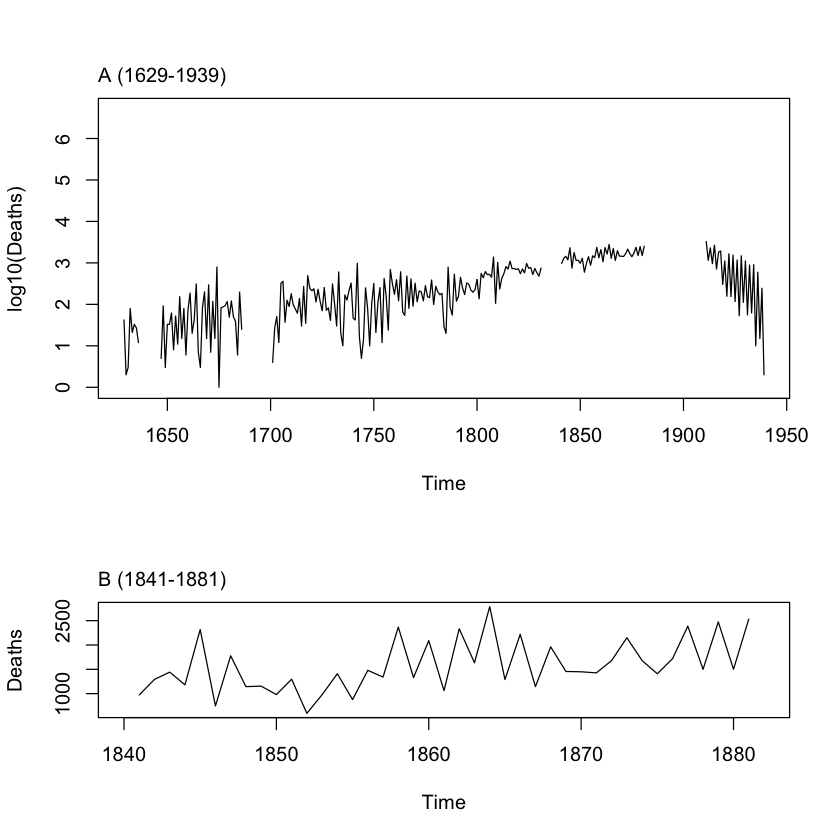

In [13]:
## Panel A:
par(fig=c(0, 1, .38, 1)) # 38% to 100% of page, in y-direction
plot(log10(measles), ylab="log10(Deaths)",
ylim=log10(c(1,5000*1000)))
mtext(side=3, line=0.5, "A (1629-1939)", adj=0)
## Panel B: window from 1840 to 1882; more complete code
par(fig=c(0, 1, 0, .4), new=TRUE) # 0% to 38% of height of figure region
plot(window(measles, start=1840, end=1882), ylab="Deaths")
mtext(side=3, line=0.5, "B (1841-1881)", adj=0)
par(fig=c(0, 1, 0, 1)) # Restore default figure region

The scatterplot is a simple but important tool for the examination of pairwise relationships.
We will illustrate with specific examples.
Figure 2.5 shows data from a tasting session where each of 17 panelists assessed the
sweetness of each of two milk samples, one with four units of additive, and the other with
one unit of additive. The line y = x has been added. The function rug() adds a “rug”,
i.e., short bars at right angles to one or other axis that show the distribution values along
that axis of the plot. The code is:

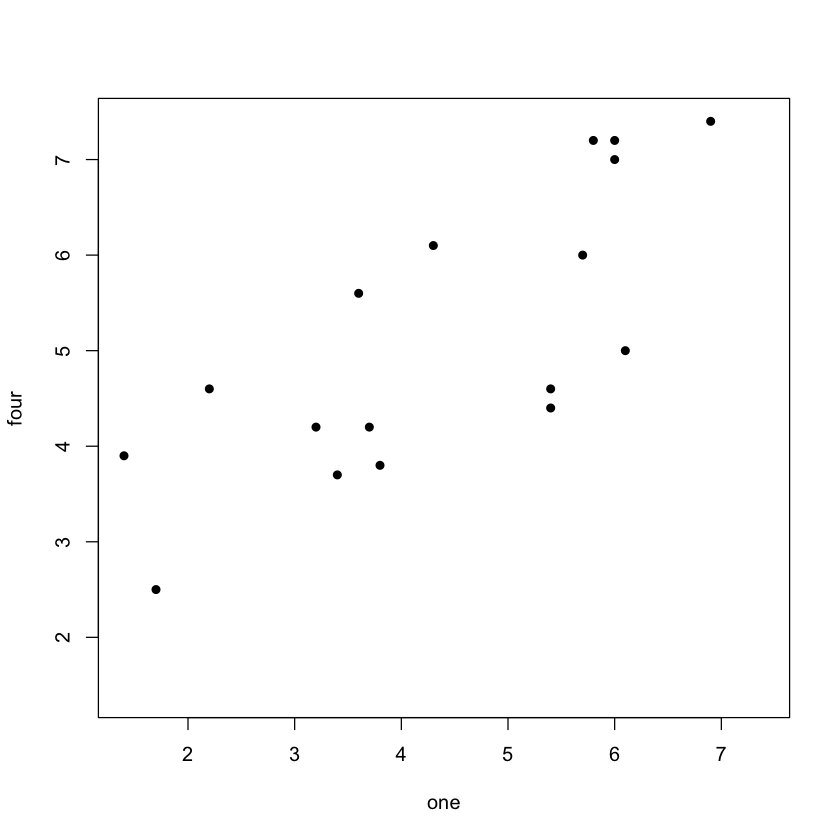

In [15]:
## Plot four vs one: data frame milk (DAAG)
xyrange <- range(milk)
plot(four ~ one, data = milk, xlim = xyrange, ylim = xyrange,
pch = 16, pty="s") # pty="s": square plotting region

Electrical resistance versus apparent juice content. Panel B repeats panel A, but with a
smooth curve fitted to the data.

There is a positive correlation between assessments for the two samples; if one was
rated as sweet, by and large so was the other. The line y = x assists in comparing the
two samples. Most panelists (13 out of 17) rated the sample with four units of additive as
sweeter than the sample with one unit of additive.

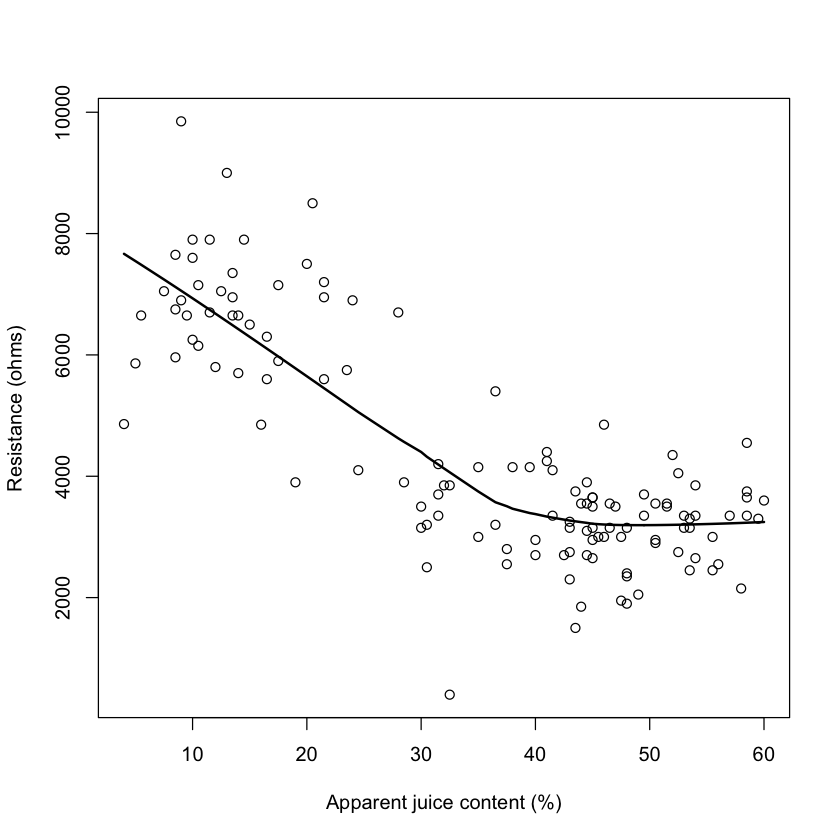

In [19]:
#rug(milk$one) # x-axis rug (default is side=1)
#rug(milk$four, side = 2) # y-axis rug
#abline(0, 1)

## Plot ohms vs juice: data frame fruitohms (DAAG)
plot(ohms ~ juice, xlab="Apparent juice content (%)",
ylab="Resistance (ohms)", data=fruitohms)
## Add a smooth curve, as in Panel B
with(fruitohms, lines(lowess(juice, ohms), lwd=2))
# With lwd=2, the curve is twice the default thickness

The fitted smooth curve shows a form of response that is clearly inconsistent with a
straight line. It suggests an approximate linear relationship for juice content up to somewhat
over 35%. Once the juice content reaches around 45%, the curve becomes a horizontal line,
and there is no evident further change in resistance. There is no obvious simple form of
equation that might be used to describe the curve.

A curve fitted using lowess() or another such smoothing function can provide a useful
benchmark against which to compare the curve given by a theoretical or other mathematical
form of equation that the data are thought to follow.

Brain weight versus body weight, for 27 animals that vary greatly in size. Panel A uses
untransformed scales, while panel B uses logarithmic scales, on both axes.


Attaching package: ‘MASS’


The following object is masked from ‘package:DAAG’:

    hills




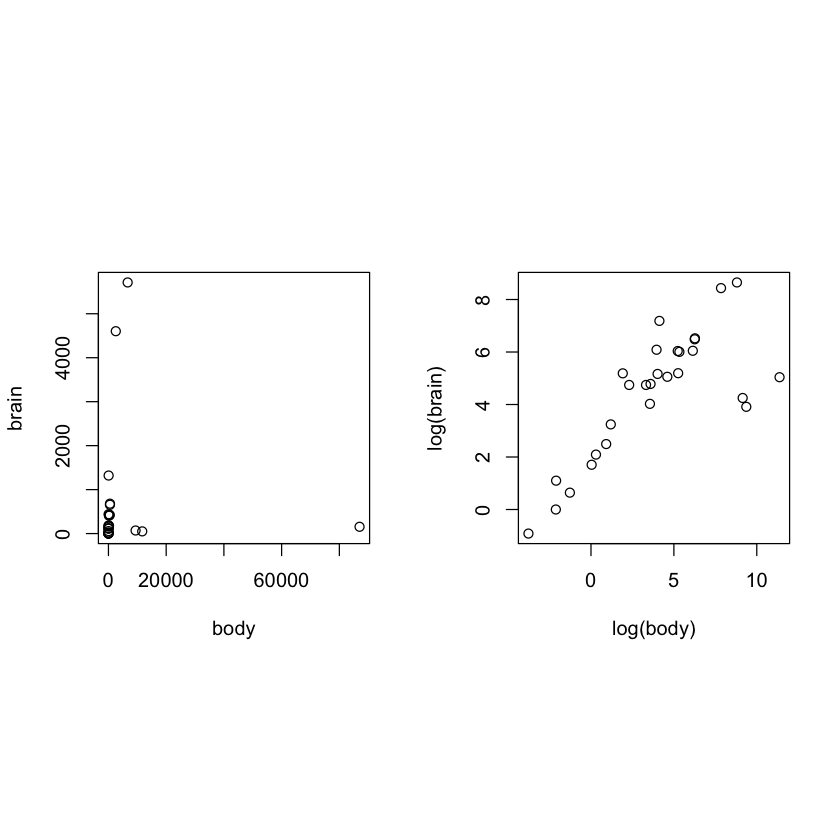

In [20]:
## The following omits the labeling information
oldpar <- par(mfrow = c(1,2), pty="s")
## Plot brain vs body: data frame Animals (MASS package)
library(MASS)
plot(brain ~ body, data=Animals) # Panel A
plot(log(brain) ~ log(body), data=Animals) # Panel B
par(oldpar)